# Homework 5 - Exploring StackOverflow!

We import the libraries

In [1]:
from app_function import *
from test_data import *

Starting to read the csv files...
        a2q read
        c2q read
        c2a read
Starting to create the graphs...
        a2q graph created
        c2q graph created
        c2a graph created
        totDataframe graph created


In [2]:
from algoquest import dormitory 

We have imported the three file and read them through the function *pd.read_csv*. We have used the the function **dataparse** to pass from an unix timestamp to a date. 


We have decided to filter the dataset through an interval of time of one month, August 2008, because in our opinion it is good tradeoff between deal with a smaller amount of data but sufficiently large interval to obtain significant result. We have also made some trials with larger interval of time, like one or two years, but the meaning of our results did not change, it increased just the running time. We have chosen this particular month because the integer values associated to users are smaller and easier to read and write. 

We have also checked how many users reply or comment to theirselves to decide how we can deal with that. But in our interval of time the number of loop is really limited so we have thought that the few that are present are due to people that maybe to clarify their comments or answers have written to theirselves

To build the merged graph firstly we have concatenated the three filtered dataframe building *totDataframe*. Through the function **make_graph** we have associated to the dataframe the graphs in which users are node and and answers/comments are weighted edges. So now a user *u* is linked to another user *v* if he has commented one of his questions, answers or if he has replied to one of his question. But these three kind of edges have different weight that we have decided to build these weights in the following way:

-  we have assigned a score of 1 to "Answers to questions"
-  we have assigned a score of 0.7 to "Comments to questions"
-  we have assigned a score of 0.4 to "Comments to answers"

Since we have thought that the answers to questions are the more relevant in the merged graph because they are possible solutions of user's question we have assigned just 0.4 to "Answers to questions". We have made this choice because in this way when we will walk on a path we will always choose this kind of link instead of other edges that weight more. We have thought that "Comments to questions" are the second in order of relevance because they could be useful to clarify a question.

## 1. Data


```python
#Answers to questions
a2q = pd.read_csv("data/sx-stackoverflow-a2q.txt", sep=" " ,header=None, names=["user_a", "user_b", "time"], parse_dates=["time"], date_parser=dateparse)

#Comments to answers
c2a = pd.read_csv("data/sx-stackoverflow-c2a.txt", sep=" " ,header=None, names=["user_a", "user_b", "time"], parse_dates=["time"], date_parser=dateparse)

#Comments to questions
c2q = pd.read_csv("data/sx-stackoverflow-c2q.txt", sep=" " ,header=None, names=["user_a", "user_b", "time"], parse_dates=["time"], date_parser=dateparse)


```

```python
a2q.to_csv("data/a2q.csv", index=False)
c2q.to_csv("data/c2q.csv", index=False)
c2a.to_csv("data/c2a.csv", index=False)
```

# 2. Implementation of the backend

We have built an unique system with different functionalities: we have created a **menu** where the users that interact with our system can decide what functionality and what kind of information inside that functionality they need, for example in functionality 1 users can decide one of the three graph to visualize the overall features or in functionality 2 what centrality metric they need. 

```python
def app():
    end = 0
    while (end == 0):

        #choose what functionality
        user = int(input("Welcome user, what functionality do you want: "))

        if (user == 1):

            funz_1()

            end = 1


        if (user == 2):
            
            functionality_2_visual()
            
            print("End of functionality 2")
            
            end = 1

        if (user == 3):
            print("Functionality 3 - Shortest Ordered Route")
            
            out_g, _, lenght = func_3()
            
            out_g.print_graph(pos="planar")
            
            print("result of func_3")
            end = 1
            
```       

Welcome user, what functionality do you want:  1
What file do you want to analyze?:  a2q


╒══════════════════════════════╤════════════════════════════════════════════════╕
│ Info requested               │ Answers                                        │
╞══════════════════════════════╪════════════════════════════════════════════════╡
│ File                         │ user_a  user_b                time  weights    │
│                              │ 0       9       8 2008-08-01 05:00:00      0.4 │
│                              │ 1       1       1 2008-08-01 06:00:00      0.4 │
│                              │ 2      13       1 2008-08-01 15:00:00      0.4 │
│                              │ 3      17       1 2008-08-01 19:00:00      0.4 │
│                              │ 4      48       2 2008-08-01 19:00:00      0.4 │
├──────────────────────────────┼────────────────────────────────────────────────┤
│ Directed or Undirected?      │ directed                                       │
├──────────────────────────────┼────────────────────────────────────────────────┤
│ N. users      

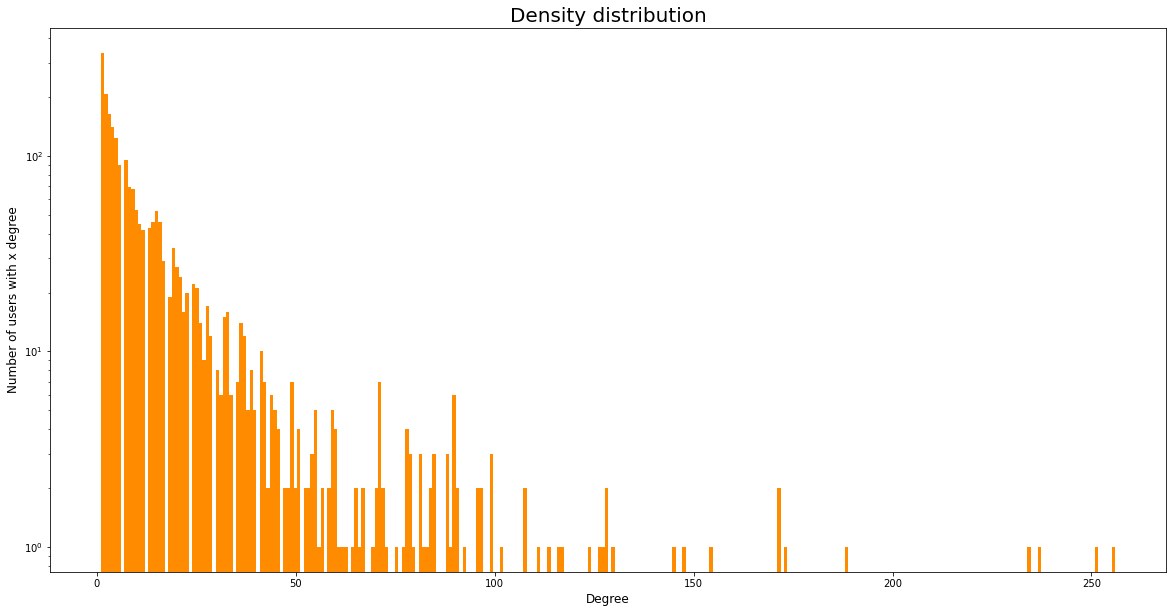

We want to go deeper in the density distribution
We want to visualize for each user how many degree it has


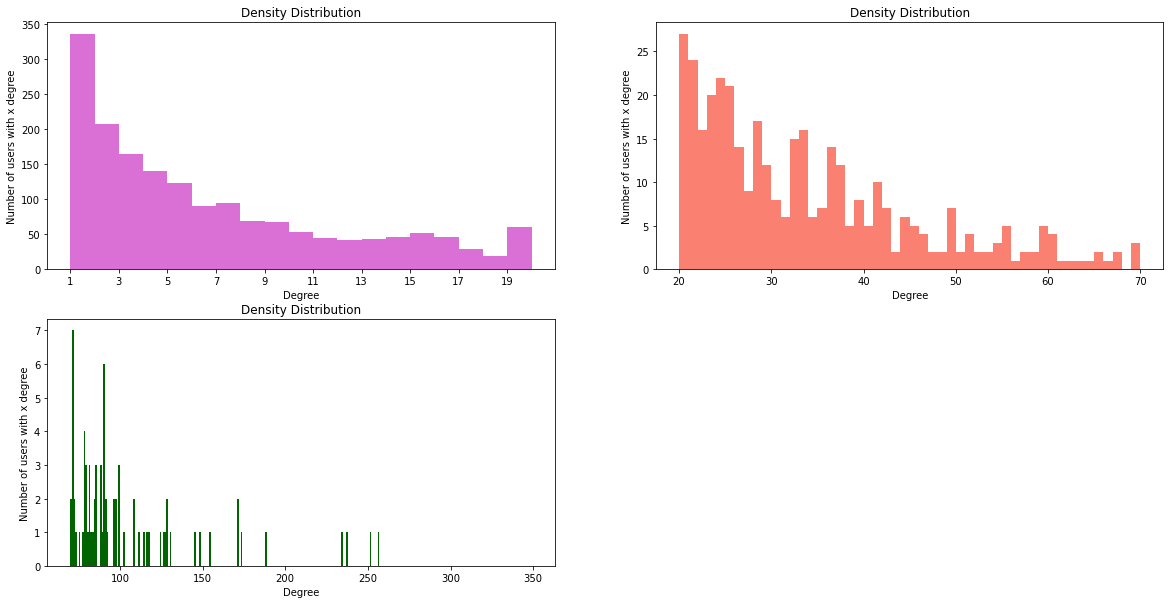

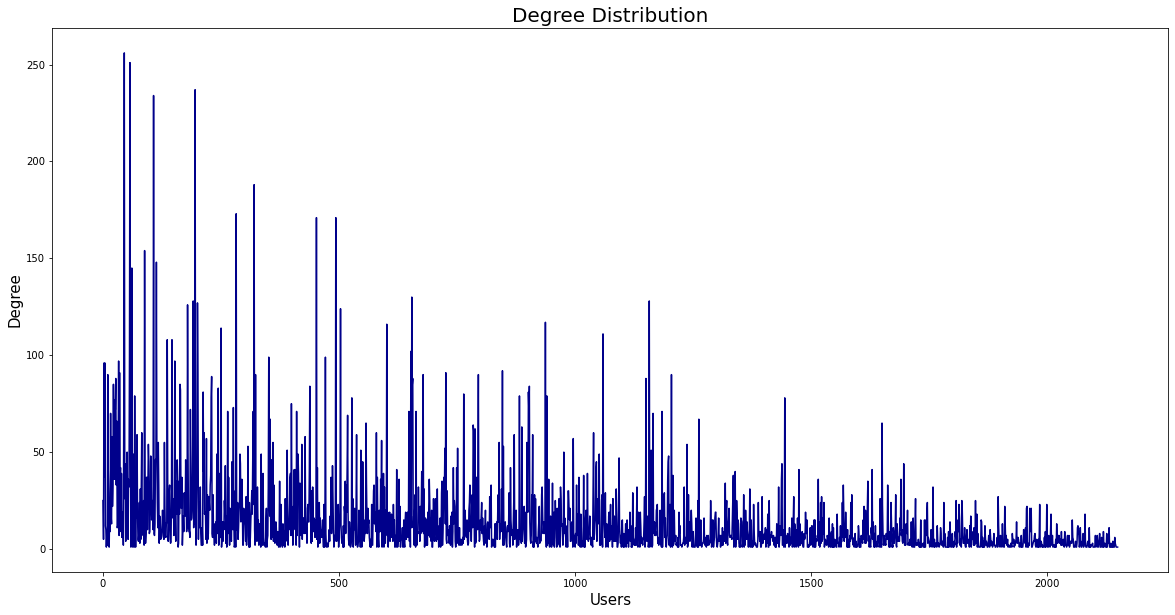

In [3]:
app()

## 2.1 Functionality 1

In functionality 1 we have generated a table with all information requested: in the first row there is the **head** of the chosen dataframe, then user discovers if the graph is **directed** or not (in an undirected graph the number of starting nodes is the same of the ending nodes). All these graphs are directed. Then the **number of users** (that is the number of nodes), **number of answer/comments** (number of edges) according to the kind of file. The **average number of links per user** is the ratio between n.of edges and n.of nodes. Since the graph is directed we have computed the **degree density** as $D = \frac{|E|}{|V| \cdot (|V| - 1)}$. A graph is **sparse** if caridnality of **E** is much less than cardinality of *$V^2$*. All these graph are sparse. 

Moreover we have plotted the **density distribution** of the graph provided as input: it is an histogram where the bins are the degree while on the y-axis we have the number of users. So through this plot we can know for a specific degree how many user has that number of edges. We have not made difference between in and out degree because we have thought that for this kind of application is more important to see how a single user interact with others. 

To visualize better this **histogram** we have splitted in three different subplots since the graph is sparse so a lot of users are condensed in the first bins and with a unique plot is more difficult see the other values. These subplots were very useful when we have done trials with larger interval of time so we have more users. 

Finally we have drawn also a **plot** in which we can see for each user his degree. Once again this plot confirms that graph is sparse, but there are few users that interact a lot. 

What file do you want to analyze?:  a2q


╒══════════════════════════════╤════════════════════════════════════════════════╕
│ Info requested               │ Answers                                        │
╞══════════════════════════════╪════════════════════════════════════════════════╡
│ File                         │ user_a  user_b                time  weights    │
│                              │ 0       9       8 2008-08-01 05:00:00      0.4 │
│                              │ 1       1       1 2008-08-01 06:00:00      0.4 │
│                              │ 2      13       1 2008-08-01 15:00:00      0.4 │
│                              │ 3      17       1 2008-08-01 19:00:00      0.4 │
│                              │ 4      48       2 2008-08-01 19:00:00      0.4 │
├──────────────────────────────┼────────────────────────────────────────────────┤
│ Directed or Undirected?      │ directed                                       │
├──────────────────────────────┼────────────────────────────────────────────────┤
│ N. users      

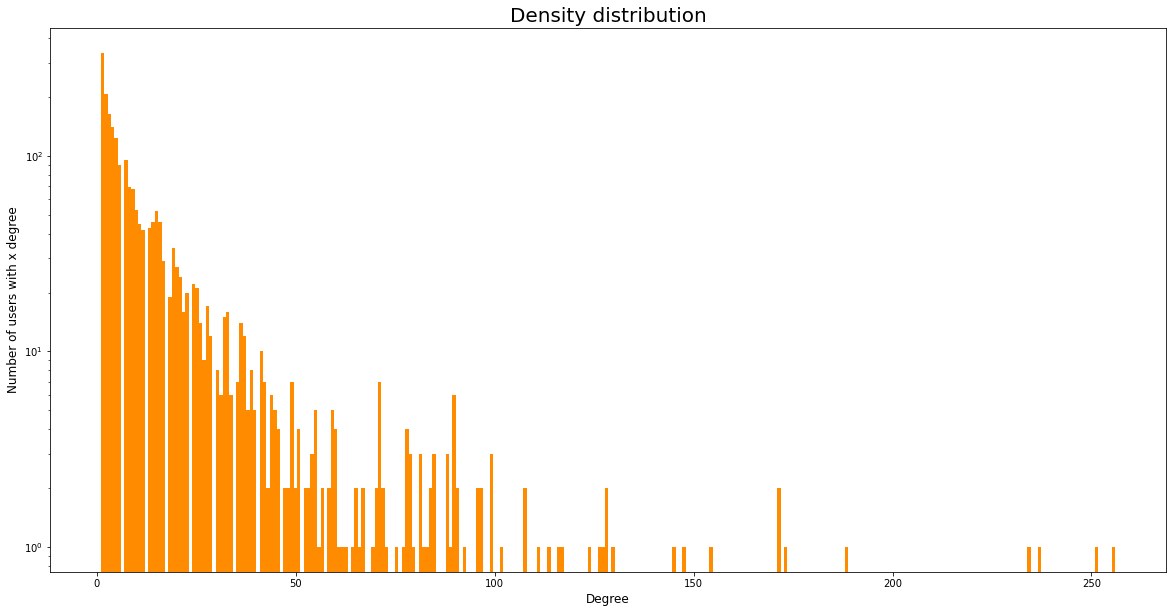

We want to go deeper in the density distribution
We want to visualize for each user how many degree it has


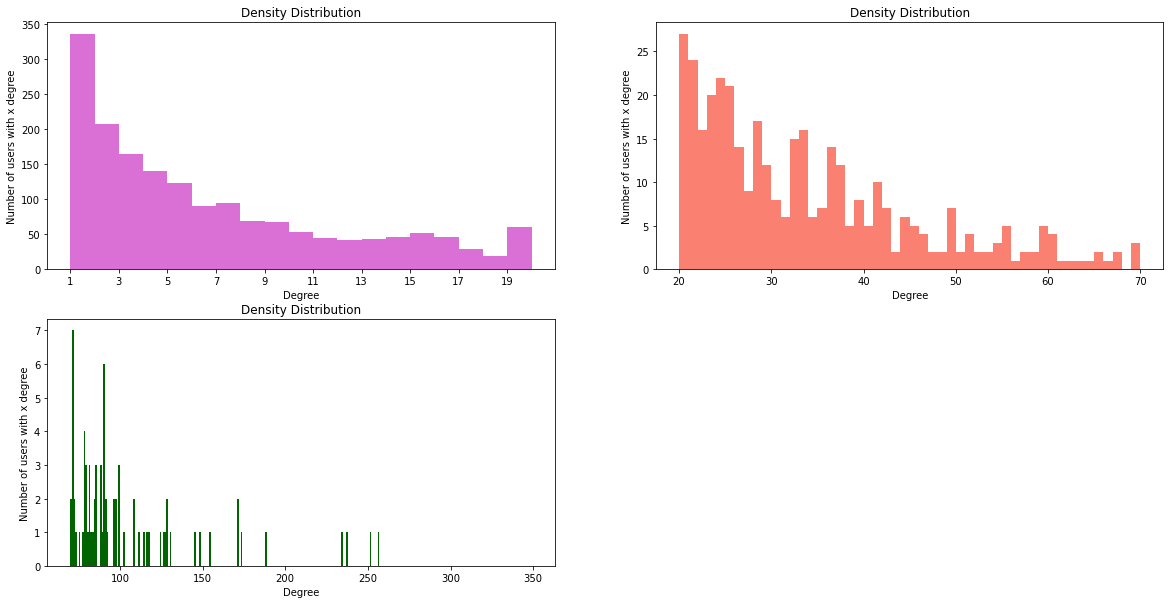

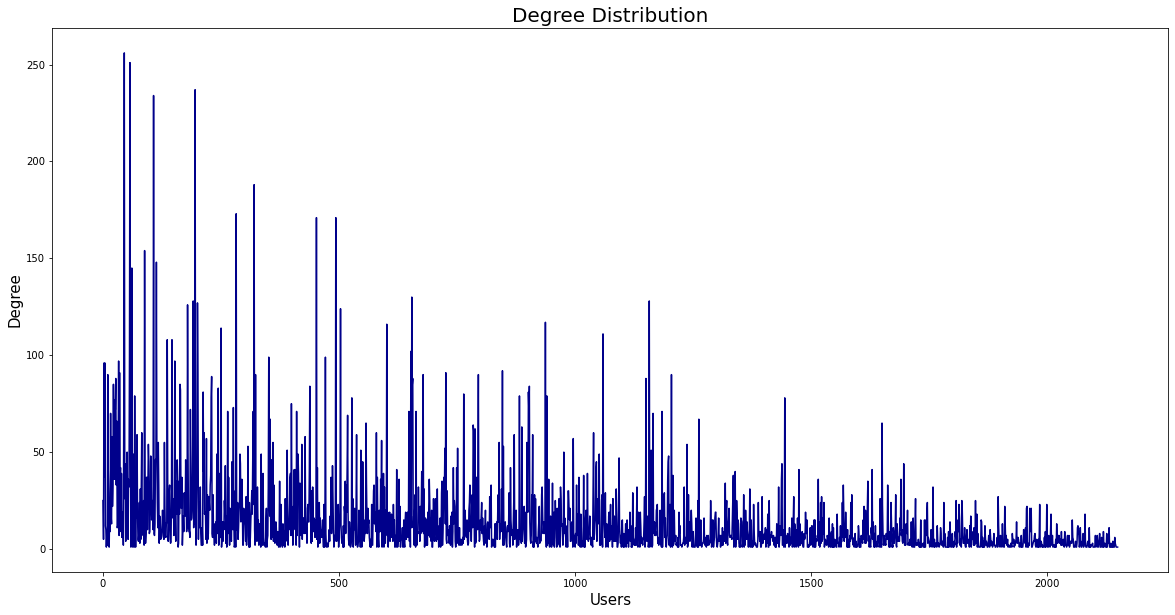

In [4]:
funz_1()

## 2.2 Functionality 2

This functionality take as input an user and an interval of time and return the choosen metric of the relative graph. The possible metrics are:

| Metric                | Explanation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|:---------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Betweeness Centrality | This metric is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex. An high value rappresent an user that in the graph have more probability to answered or made a question |
| Page Rank             | This metric is a way of measuring the importance of website pages. In our case, the metric point the importance of an user in the community.                                                                                                                                                                                                                                                                                                                                                      |
| Closeness Centrality  | This metric is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes. So more central an user is, more the user answered or made a question.                                                                                                                                                                 |
| Degree Centrality     | This metric is defined as the number of links incident upon a node. Thus, the more central a node is, more the user answered or made a question or comment.                                                                                                                                                                                                                                                                                                                                       |



The function draw also plot that reppresent the variation of the metrix in the subintervals of time.

FUNCTIONALITY 2:


Insert start time:  2008-08-01
Insert end time:  2008-08-02
Insert node:  1


Choose the metrix:

1:Betweeness Centrality
2:PageRank
3:Closeness Centrality
4:Degree Centrality


metric number:  1


  0%|          | 0/5 [00:00<?, ?it/s]

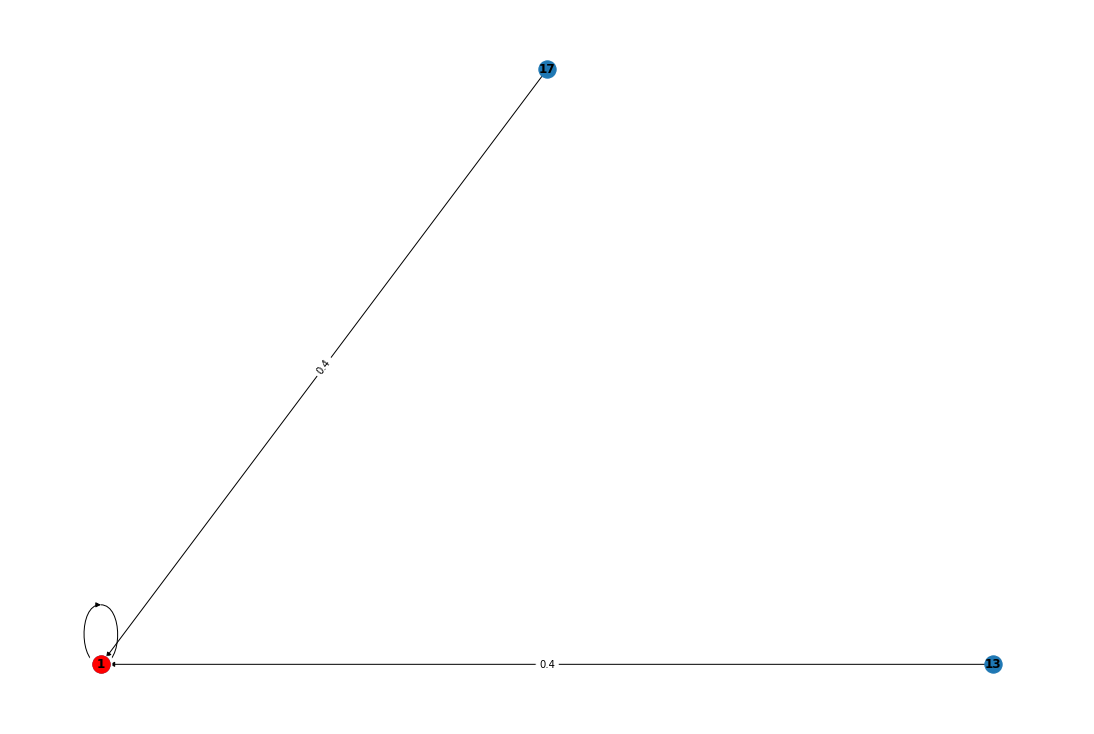

  0%|          | 0/24 [00:00<?, ?it/s]

[0.0, 0, 1.0, 1.0, 1.0, 0.6666666666666666]

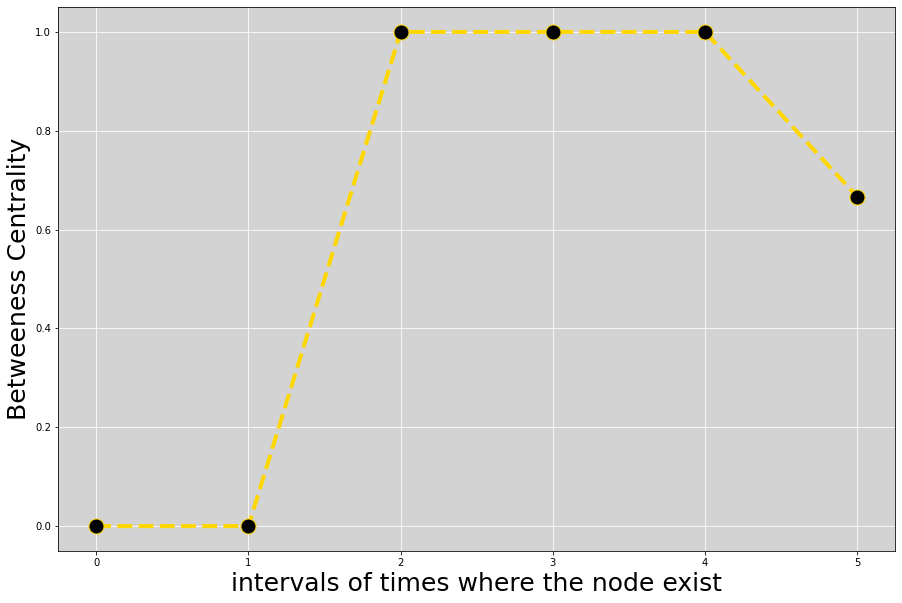

In [6]:
functionality_2_visual()

FUNCTIONALITY 2:


Insert start time:  2008-08-01
Insert end time:  2008-08-02
Insert node:  1


Choose the metrix:

1:Betweeness Centrality
2:PageRank
3:Closeness Centrality
4:Degree Centrality


metric number:  2


  0%|          | 0/5 [00:00<?, ?it/s]

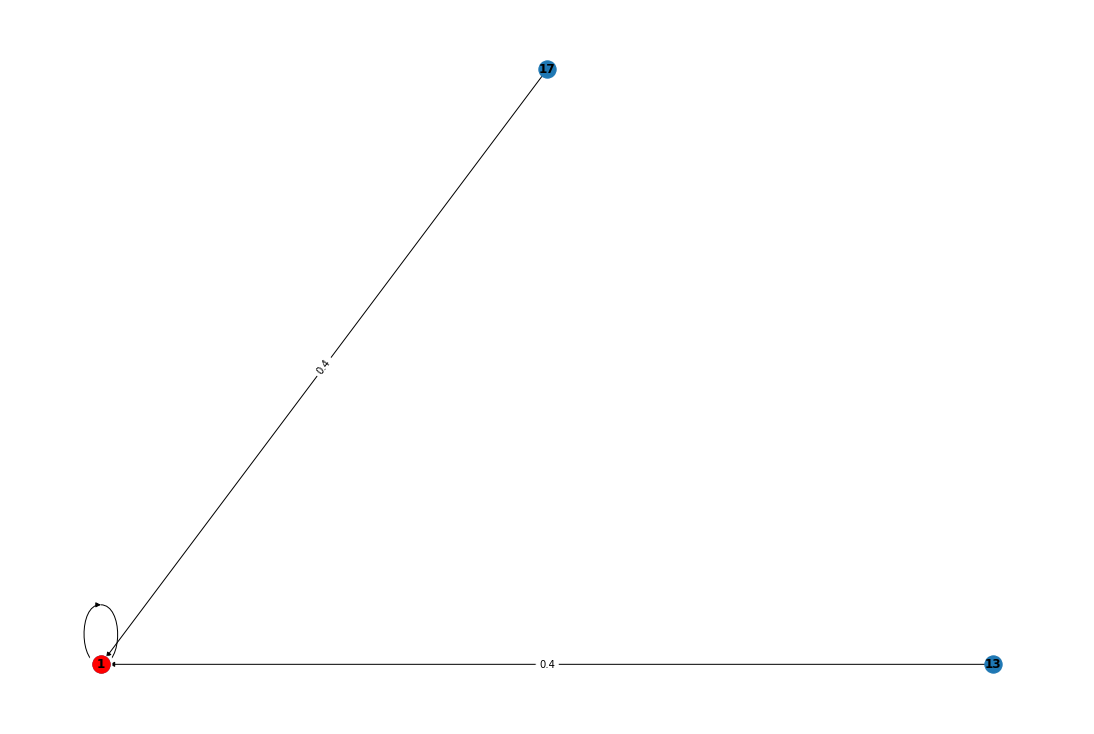

  0%|          | 0/24 [00:00<?, ?it/s]

[0.3333333333333333, 1.0, 0.5, 0.5, 0.08333333333333333, 0.041363636363636366]

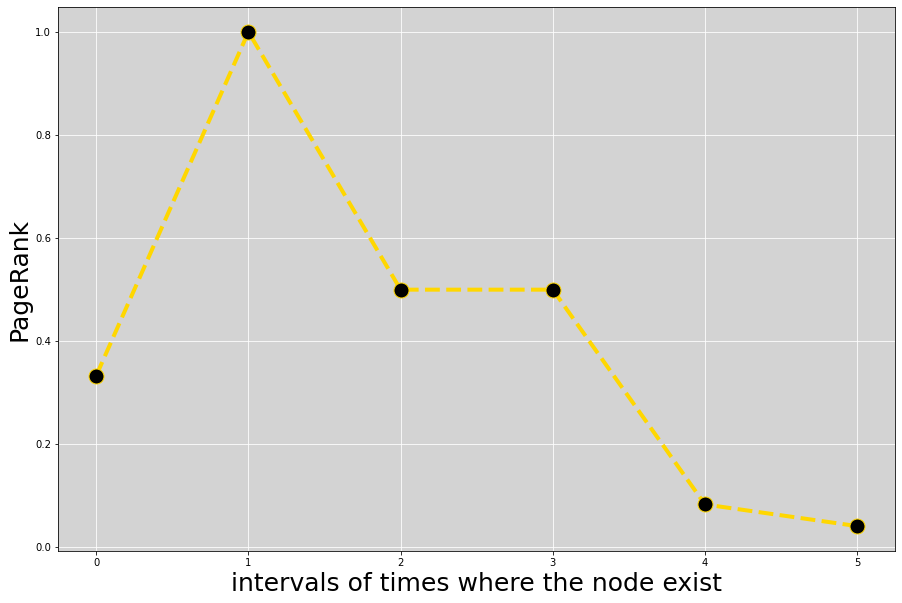

In [7]:
functionality_2_visual()

FUNCTIONALITY 2:


Insert start time:  2008-08-01
Insert end time:  2008-08-02
Insert node:  1


Choose the metrix:

1:Betweeness Centrality
2:PageRank
3:Closeness Centrality
4:Degree Centrality


metric number:  3


  0%|          | 0/5 [00:00<?, ?it/s]

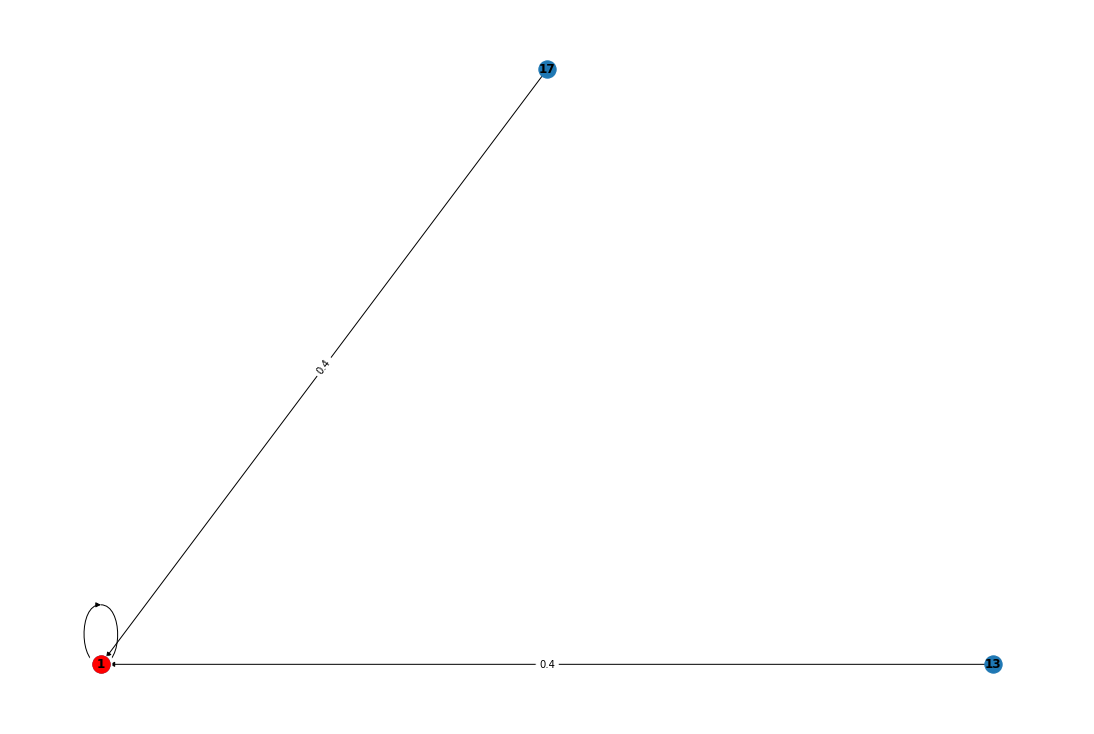

  0%|          | 0/24 [00:00<?, ?it/s]

[0.0, 0, 0.0, 0.0, 0.0, 0.0]

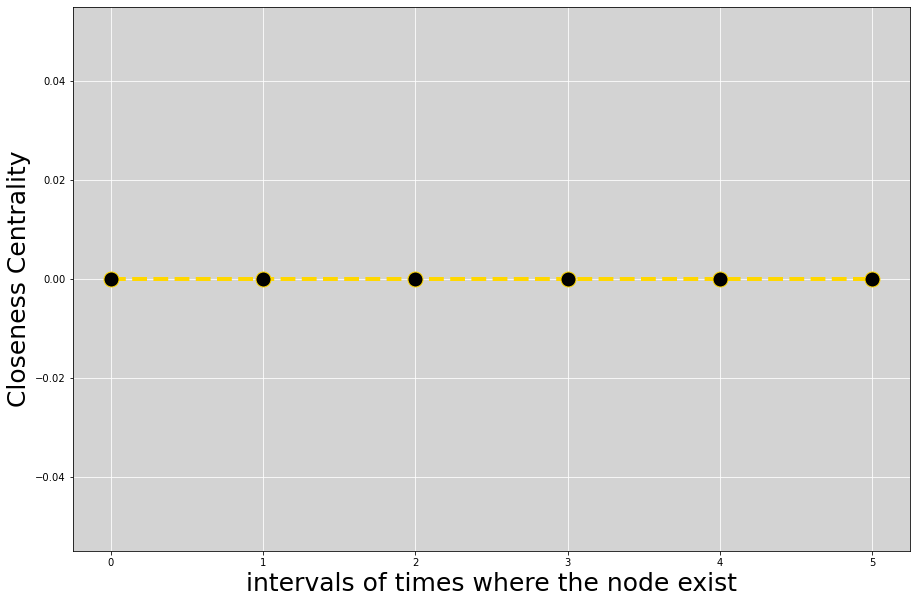

In [8]:
functionality_2_visual()

FUNCTIONALITY 2:


Insert start time:  2008-08-01
Insert end time:  2008-08-02
Insert node:  1


Choose the metrix:

1:Betweeness Centrality
2:PageRank
3:Closeness Centrality
4:Degree Centrality


metric number:  4


  0%|          | 0/5 [00:00<?, ?it/s]

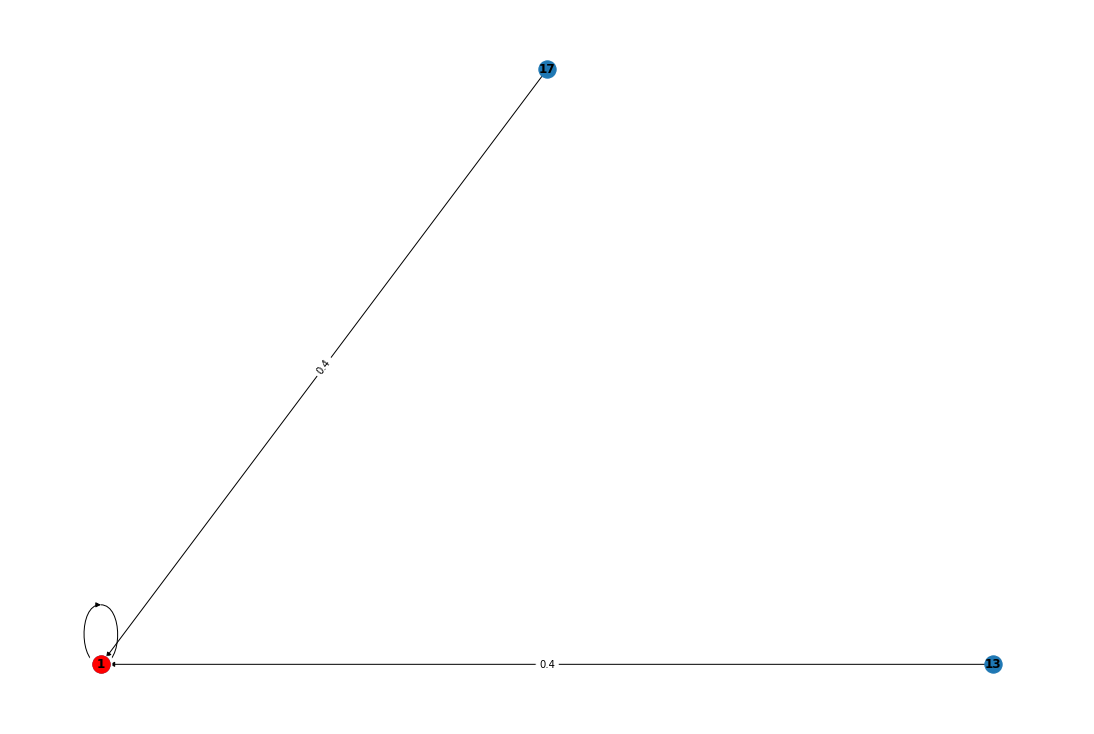

  0%|          | 0/24 [00:00<?, ?it/s]

[2, 2, 0, 0, 0, 0]

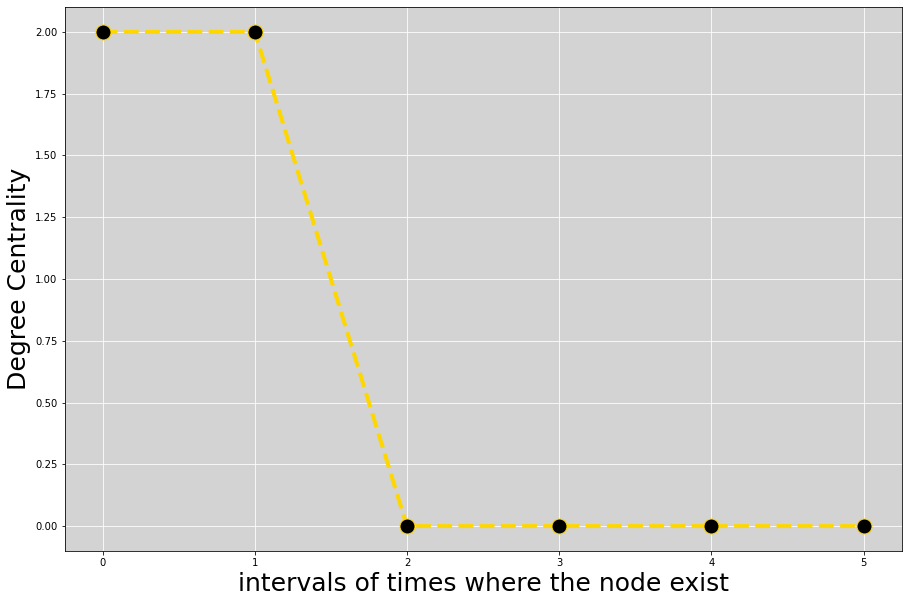

In [9]:
functionality_2_visual()

## 2.3 Functionality 3

The goal of this functionality is to return the shortest walk that goes from user a starting user p_1 to a final user p_n, and visits in order the nodes in a list of p users. 

So the user that has to interact with this functionality has to decide from what user starts and where to end his path. Moreover he has to insert write a list of p users, (integer numbers separated by spaces), that he wants to visit in order. In output he will receive a draw of the path that he has decided and the length of the shortest path. 

To make possible this functionality the main idea has been to apply the **Dijkstra's algorithm**, that we have implemented by scratch, to each vertex of the path, indeed we have to visit the users in order so each time we are able to find the next user. It is possible that a user in the path is disconnected or that is a leaf in the graph, in other words from him no edges start. In these cases the output of this functionality is "*Not Possible*".

We have made different trials to check if our functions work properly.

In [10]:
out_g, _, l = func_3()

Insert list of user:  1 67
Insert the starting user:  13
Insert the final user:  83


  0%|          | 0/3 [00:00<?, ?it/s]

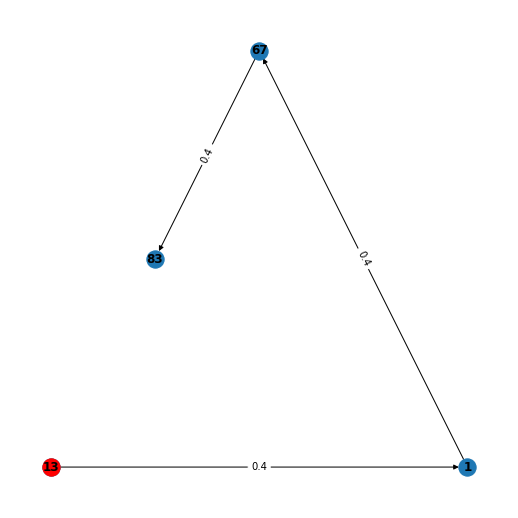

In [11]:
out_g.print_graph(pos="planar", highlight=True, highlighted_node=13);

## 2.4 Functionality 4

We have tried at the end to do functionality 4 implemeting tha algorithm of mincut seen during lessons. We have written the function to contract two nodes and then we pick at random at each step one edge. 
Firstly we have tried to do this with Ford–Fulkerson algorithm. It seemed that itworked but it was too slowly and with the size of this graph did not print the results.

```python

def search_min_cut(g):
    g_copy = deepcopy(g)
    minimumcut = 0
    
    while len(g_copy) >= 3:
        # Now we  Pick a random edge
        node1, node2 = rd.sample(g_copy.nodes.keys(), 2)
        
        contraction(node1, node2, g_copy)
        
        
        
    #  we now Calculate the minimum cut
    minimumcut = g_copy.num_edges
    #  finally return min cut and the two supervertices
    return minimumcut, g_copy, g_copy.nodes.keys() 

def contraction(node1, node2, g):
    
    g.delete_edge(node1, node2)
    
    print(g.nodes[node1])
    print(g.nodes[node2])
    
    g.nodes[node1].extend(g.nodes[node2])
    
    print(g.nodes[node1])
    
    for edge in g.nodes[node1]:
        
        if(edge.from_n == node2):
            print("from_n!")
            edge.from_n = node1
        
        if(edge.to_n == node2):
            print("to_n!")
            edge.to_n = node1
            
    
    g.nodes.pop(node2, None)
    
    g.nodes[node1] = [edge for edge in g.nodes[node1] if edge.from_n != node1 and edge.to_n != node1]
    
    
    
    

```

## Algorithmic Question

We represent the kids as a list of numbers *n* and the couples of kids that often fight are represented as list of tuples *k*.  

The main idea to solve this problem is check the list of tuples: two element in the same tuple cannot be in the same dormitory. Moreover there are kids that often fight with more than one kids, so we have taken in consideration also this event checking if in the dormitory there could be already ill-tempered kids for the new kid to settle. 

In the algorithm that we have implemented there are two cycle in k and one cycle in n but they are not nested, its running time is in the order of $O$(n + 2k). So we can conclude that is linear in n and in k.

We have made different trials to check to our solution. 

In [12]:
k = [(1,3),(4,1),(3,4)]
n = [1,2,3,4,5,6]
dormitory(n,k)
#3 and 4 must be in the same dormitory 


no combination


In [13]:
k = [(1,3),(4,1),(2,4)]
n = [1,2,3,4,5,6]
dormitory(n,k)

In first dormitory there are the following kids: [1, 2, 5, 6]
In second dormitory there are the following kids: [3, 4]


In [14]:
k = [(1,3),(4,1),(3,2),(2,5)]
n = [1,2,3,4,5,6]
dormitory(n,k)

In first dormitory there are the following kids: [1, 2, 6]
In second dormitory there are the following kids: [3, 4, 5]


In [15]:
k = [(1,3),(4,1),(3,2),(2,5),(1,6)]
n = [1,2,3,4,5,6]
dormitory(n,k)

In first dormitory there are the following kids: [1, 2]
In second dormitory there are the following kids: [3, 4, 5, 6]


In [16]:
k = [(1,3),(4,1),(3,2),(2,5),(2,6),(10,7),(8,9)]
n = [1,2,3,4,5,6,7,8,9,10]
dormitory(n,k)

In first dormitory there are the following kids: [1, 2, 7, 8]
In second dormitory there are the following kids: [3, 4, 5, 6, 10, 9]


In [17]:
k = [(1,3),(4,1),(3,2),(2,5),(1,2)]
n = [1,2,3,4,5,6,7,8,9,10]
#2 cannot sleep with 1, but also with 3
dormitory(n,k)

no combination


In [18]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = [(5, 2), (7, 1), (7, 3), (6, 10)]
dormitory(n,k)

In first dormitory there are the following kids: [2, 1, 3, 6, 4, 8, 9]
In second dormitory there are the following kids: [5, 7, 10]


In [19]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = [(5, 2), (2, 5), (7, 3), (7, 2)]
dormitory(n,k)

In first dormitory there are the following kids: [2, 3, 1, 4, 6, 8, 9, 10]
In second dormitory there are the following kids: [5, 7]
